# Importing our dataset

In [ ]:
import pandas as pand
from numpy import loadtxt
from keras.models import Sequential, Model
from keras.layers import Dense, Embedding, Input, Bidirectional, Concatenate,LSTM
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

oneHotEncoder = OneHotEncoder()
minMaxScaler = MinMaxScaler()

# download file from https://www.kaggle.com/fedesoriano/stroke-prediction-dataset then put it in sample_data
dataset = pand.read_csv("./sample_data/healthcare-dataset-stroke-data.csv")

# Parse Dataset

In [ ]:
dataset = dataset.fillna(value=0)
dataset.replace(['N/A'], [0], inplace=True)
# dataset.replace(['Female', 'Male', 'Other'], [0, 1, 2], inplace=True)
# dataset.replace(['Yes', 'No'], [1, 0], inplace=True)
# dataset.replace(['Urban', 'Rural'], [0, 1], inplace=True)
# dataset.replace(['Private', 'Self-employed', 'Other'], [0, 1, 2], inplace=True)
# dataset.replace(['Urban', 'Rural'], [0, 1], inplace=True)
dataset = dataset.reindex(columns=['age', 'hypertension', 'avg_glucose_level', 'bmi', 'heart_disease', 'work_type', 'gender', 'ever_married', 'Residence_type', 'smoking_status', 'stroke'])

dataset.head().to_excel('head.xlsx');
dataset.head()

,age,hypertension,avg_glucose_level,bmi,heart_disease,work_type,gender,ever_married,Residence_type,smoking_status,stroke
0,67.0,0,228.69,36.6,1,Private,Male,Yes,Urban,formerly smoked,1
1,61.0,0,202.21,0.0,0,Self-employed,Female,Yes,Rural,never smoked,1
2,80.0,0,105.92,32.5,1,Private,Male,Yes,Rural,never smoked,1
3,49.0,0,171.23,34.4,0,Private,Female,Yes,Urban,smokes,1
4,79.0,1,174.12,24.0,0,Self-employed,Female,Yes,Rural,never smoked,1


# Diagrams

In [ ]:
for col in ['age', 'avg_glucose_level', 'bmi']:
  coldf = dataset[col];
  print(col+":")
  print("Mean {:.2f}".format(coldf.mean()))
  print("Mode {:.2f}".format(coldf.mode()[0]))
  print("Median {:.2f}".format(coldf.median()))
  
  q1 = coldf.quantile(.25)
  q3 = coldf.quantile(.75)
  iqr = q3 - q1
  print("IQR {:.2f}".format(iqr))
  print("Range {:.2f}".format(coldf.max()-coldf.min()))
  print("Standard deviation {:.2f}".format(coldf.std()))
  print("Variance {:.2f}".format(coldf.var()))

  print("==============")

age:
Mean 43.23
Mode 78.00
Median 45.00
IQR 36.00
Range 81.92
Standard deviation 22.61
Variance 511.33
avg_glucose_level:
Mean 106.15
Mode 93.88
Median 91.88
IQR 36.85
Range 216.62
Standard deviation 45.28
Variance 2050.60
bmi:
Mean 27.76
Mode 0.00
Median 27.70
IQR 9.90
Range 97.60
Standard deviation 9.53
Variance 90.81


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f946fddb850>],
      dtype=object)

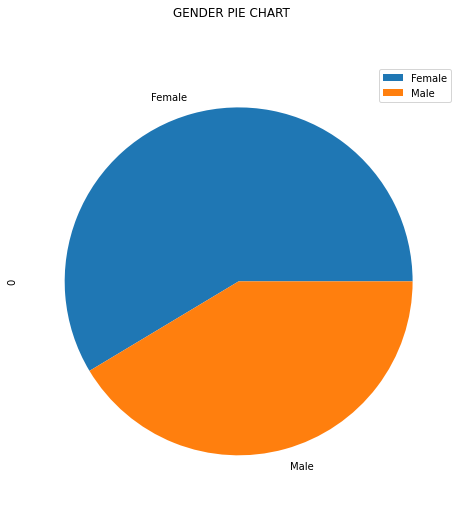

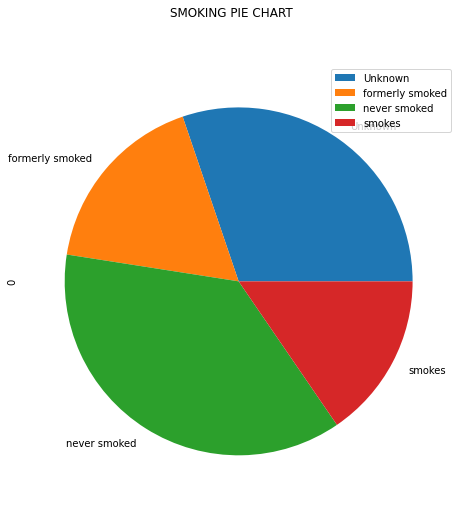

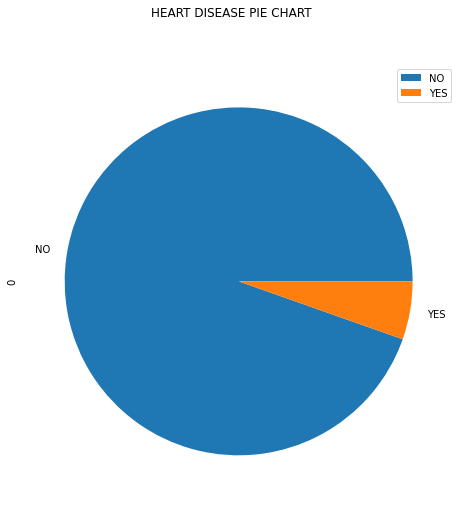

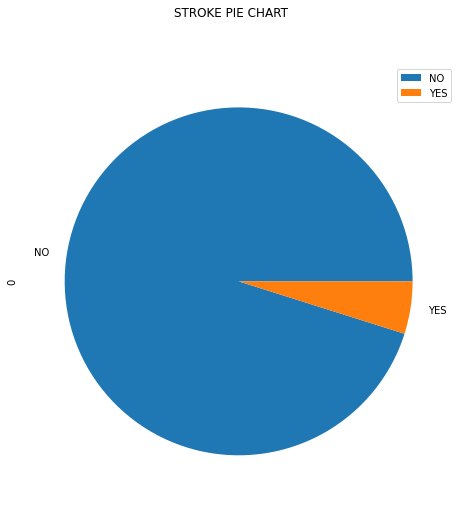

In [ ]:
from matplotlib.pyplot import pie, axis, show
import matplotlib.pyplot as plt
import math

pth = './sample_data/'
sheet_name = 'Sheet1'

# PIE CHARTS
df = dataset[['gender']]
df = df.drop(df[df['gender'] == 'Other'].index)
df_grouped = df.groupby(['gender']).size().reset_index()
table = pand.pivot_table(df_grouped, index=['gender'])
table = table.dropna(axis=1).astype(int)
excel_file = pth+'gender_pie.xlsx'
df_grouped.to_excel(excel_file, sheet_name=sheet_name)

table.plot(kind='pie', subplots = True, figsize=(8,8),title="GENDER PIE CHART")

df = dataset[['smoking_status']]
df_grouped = df.groupby(['smoking_status']).size().reset_index()
df_grouped
table = pand.pivot_table(df_grouped, index=['smoking_status'])
table = table.dropna(axis=1).astype(int)
excel_file = pth+'smoking_pie.xlsx'
df_grouped.to_excel(excel_file, sheet_name=sheet_name)

table.plot(kind='pie', subplots = True, figsize=(8,8),title="SMOKING PIE CHART")


df = dataset[['heart_disease']]
df = df.replace([0,1], ['NO', 'YES'])
df_grouped = df.groupby(['heart_disease']).size().reset_index()
table = pand.pivot_table(df_grouped, index=['heart_disease'])
table = table.dropna(axis=1).astype(int)
excel_file = pth+'heart_disease_pie.xlsx'
df_grouped.to_excel(excel_file, sheet_name=sheet_name)

table.plot(kind='pie', subplots = True, figsize=(8,8),title="HEART DISEASE PIE CHART")

df = dataset[['stroke']]
df = df.replace([0,1], ['NO', 'YES'])
df_grouped = df.groupby(['stroke']).size().reset_index()
table = pand.pivot_table(df_grouped, index=['stroke'])
table = table.dropna(axis=1).astype(int)
excel_file = pth+'stroke_pie.xlsx'
df_grouped.to_excel(excel_file, sheet_name=sheet_name)

table.plot(kind='pie', subplots = True, figsize=(8,8),title="STROKE PIE CHART")
# END PIE CHARTS


[67.0, 61.0, 80.0, 49.0, 79.0, 81.0, 74.0, 69.0, 59.0, 78.0, 81.0, 61.0, 54.0, 78.0, 79.0, 50.0, 64.0, 75.0, 60.0, 57.0, 71.0, 52.0, 79.0, 82.0, 71.0, 80.0, 65.0, 58.0, 69.0, 59.0, 57.0, 42.0, 82.0, 80.0, 48.0, 82.0, 74.0, 72.0, 58.0, 49.0, 78.0, 54.0, 82.0, 63.0, 60.0, 76.0, 75.0, 58.0, 81.0, 39.0, 76.0, 78.0, 79.0, 77.0, 63.0, 63.0, 82.0, 78.0, 73.0, 54.0, 56.0, 80.0, 67.0, 45.0, 75.0, 78.0, 70.0, 76.0, 59.0, 80.0, 76.0, 67.0, 66.0, 63.0, 52.0, 80.0, 80.0, 79.0, 51.0, 43.0, 59.0, 66.0, 79.0, 68.0, 58.0, 54.0, 61.0, 70.0, 47.0, 74.0, 79.0, 81.0, 57.0, 80.0, 45.0, 78.0, 70.0, 58.0, 57.0, 69.0, 64.0, 77.0, 74.0, 81.0, 57.0, 58.0, 50.0, 54.0, 79.0, 53.0, 79.0, 80.0, 76.0, 45.0, 68.0, 71.0, 61.0, 74.0, 38.0, 77.0, 58.0, 53.0, 80.0, 56.0, 72.0, 72.0, 78.0, 80.0, 82.0, 75.0, 73.0, 78.0, 69.0, 38.0, 68.0, 71.0, 76.0, 76.0, 76.0, 75.0, 82.0, 59.0, 74.0, 69.0, 72.0, 66.0, 65.0, 78.0, 57.0, 70.0, 79.0, 68.0, 80.0, 68.0, 55.0, 77.0, 50.0, 57.0, 71.0, 81.0, 76.0, 71.0, 1.32, 78.0, 70.0, 78.0, 56.

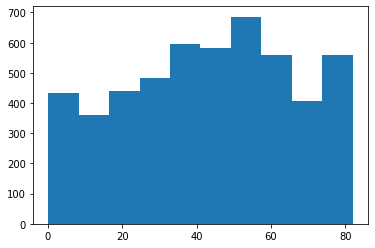

[36.6, 0.0, 32.5, 34.4, 24.0, 29.0, 27.4, 22.8, 0.0, 24.2, 29.7, 36.8, 27.3, 0.0, 28.2, 30.9, 37.5, 25.8, 37.8, 0.0, 22.4, 48.9, 26.6, 32.5, 27.2, 23.5, 28.2, 0.0, 28.3, 0.0, 44.2, 25.4, 22.2, 30.5, 29.7, 26.5, 33.7, 23.1, 32.0, 29.9, 23.9, 28.5, 26.4, 0.0, 20.2, 33.6, 0.0, 38.6, 33.7, 39.2, 0.0, 0.0, 27.7, 31.4, 0.0, 36.5, 33.2, 0.0, 32.8, 27.7, 40.4, 22.2, 25.3, 30.2, 0.0, 24.0, 47.5, 20.3, 30.0, 28.9, 0.0, 28.1, 31.1, 27.4, 26.4, 21.7, 27.0, 24.1, 0.0, 45.9, 44.1, 0.0, 22.9, 29.7, 0.0, 29.1, 27.3, 32.3, 41.1, 25.6, 29.8, 26.3, 37.5, 26.2, 29.4, 32.3, 24.4, 31.4, 27.7, 28.0, 28.8, 31.4, 34.6, 19.4, 28.5, 0.0, 30.3, 40.4, 24.2, 41.5, 22.6, 24.2, 0.0, 56.6, 27.1, 30.9, 27.3, 31.3, 24.0, 31.0, 28.0, 30.3, 31.7, 35.8, 0.0, 28.4, 0.0, 24.0, 29.0, 0.0, 36.5, 20.1, 36.5, 0.0, 26.7, 38.7, 29.9, 34.9, 27.0, 26.6, 25.0, 23.8, 21.8, 36.8, 30.0, 27.5, 0.0, 24.6, 32.9, 26.1, 0.0, 31.9, 34.1, 27.5, 25.6, 36.9, 31.4, 37.3, 34.1, 25.0, 0.0, 0.0, 0.0, 45.7, 34.2, 23.6, 27.3, 0.0, 22.3, 31.4, 0.0, 0.0

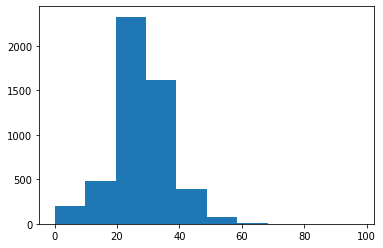

[228.69, 202.21, 105.92, 171.23, 174.12, 186.21, 70.09, 94.39, 76.15, 58.57, 80.43, 120.46, 104.51, 219.84, 214.09, 167.41, 191.61, 221.29, 89.22, 217.08, 193.94, 233.29, 228.7, 208.3, 102.87, 104.12, 100.98, 189.84, 195.23, 211.78, 212.08, 83.41, 196.92, 252.72, 84.2, 84.03, 219.72, 74.63, 92.62, 60.91, 78.03, 71.22, 144.9, 90.9, 213.03, 243.58, 109.78, 107.26, 99.33, 58.09, 89.96, 75.32, 127.29, 124.13, 197.54, 196.71, 59.32, 237.75, 194.99, 180.93, 185.17, 74.9, 61.94, 93.72, 104.72, 113.01, 221.58, 104.47, 86.23, 72.67, 62.57, 179.12, 116.55, 228.56, 96.59, 66.72, 240.09, 110.85, 165.31, 143.43, 96.16, 101.45, 88.92, 79.79, 71.2, 96.97, 111.81, 59.35, 86.94, 98.55, 226.98, 72.81, 68.02, 68.56, 64.14, 235.63, 76.34, 240.59, 78.92, 82.81, 74.1, 190.32, 231.61, 78.7, 110.52, 82.3, 73.18, 191.82, 93.05, 64.17, 129.98, 68.53, 106.41, 224.1, 82.1, 216.94, 76.11, 72.96, 82.28, 105.22, 59.86, 62.55, 259.63, 249.31, 219.91, 131.41, 93.13, 73.54, 200.59, 62.48, 190.14, 130.54, 182.99, 101.45

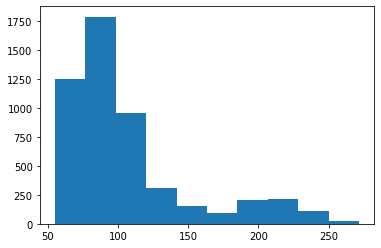

In [ ]:

# HISTROGRAMS 
age = dataset['age'].tolist()
print(age)
length = len(age)
mx = max(age)
mn = min(age)
excel_file = pth+'age_his.xlsx'
dataset['age'].to_excel(excel_file, sheet_name=sheet_name)


plt.hist(age,bins=10)
plt.show()

bmi = dataset['bmi'].tolist()
print(bmi)
length = len(age)
mx = max(age)
mn = min(age)
excel_file = pth+'bmi_his.xlsx'
dataset['bmi'].to_excel(excel_file, sheet_name=sheet_name)

plt.hist(bmi,bins=10)
plt.show()

avg_glucose_level = dataset['avg_glucose_level'].tolist()
print(avg_glucose_level)
length = len(age)
mx = max(age)
mn = min(age)
excel_file = pth+'avg_glucose_level_his.xlsx'
dataset['avg_glucose_level'].to_excel(excel_file, sheet_name=sheet_name)

plt.hist(avg_glucose_level,bins=10)
plt.show()

# HISTOGRAMS END

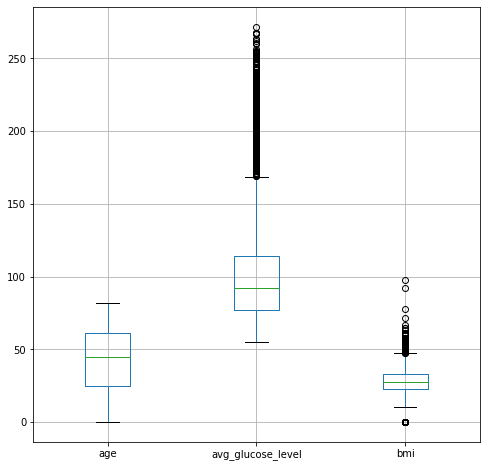

In [ ]:
dataset.drop(['hypertension', 'heart_disease', 'stroke'], axis=1).boxplot(figsize=(8,8))

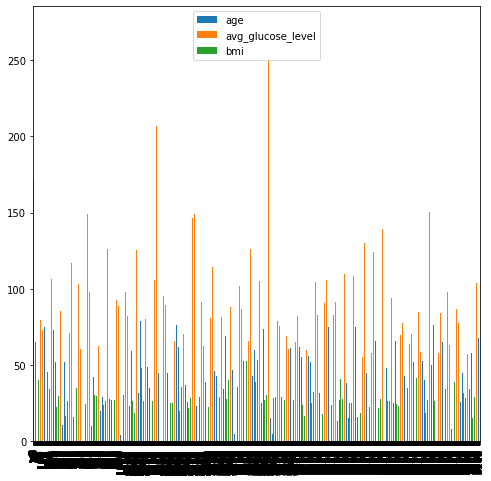

In [ ]:
dataset.drop(['hypertension', 'heart_disease', 'stroke'], axis=1).plot.bar(figsize=(8,8))

In [ ]:
model_inp = dataset.iloc[:, 0:10]
model_out = dataset.iloc[:, 10]


# input preparation for trainning
model_inp = pand.concat([model_inp, pand.get_dummies(model_inp["gender"])], axis=1)
model_inp = pand.concat([model_inp, pand.get_dummies(model_inp["Residence_type"])], axis=1)
model_inp = pand.concat([model_inp, pand.get_dummies(model_inp["ever_married"])], axis=1)
model_inp = model_inp.rename(columns={"Yes": "married"})
model_inp = pand.concat([model_inp, pand.get_dummies(model_inp["work_type"])], axis=1)
model_inp = pand.concat([model_inp, pand.get_dummies(model_inp["smoking_status"])], axis=1)
model_inp.drop(['gender', 'Other', 'Residence_type', 'ever_married', 'No', 'work_type', 'Rural', 'smoking_status', 'children', 'Unknown'], axis=1, inplace=True)

# normalization to numeric values
num_vars = ['age', 'avg_glucose_level', 'bmi']

model_inp[num_vars] = minMaxScaler.fit_transform(model_inp[num_vars])


model_inp[:5]

,age,hypertension,avg_glucose_level,bmi,heart_disease,Female,Male,Urban,married,Govt_job,Never_worked,Private,Self-employed,formerly smoked,never smoked,smokes
0,0.816895,0,0.801265,0.375000,1,0,1,1,1,0,0,1,0,1,0,0
1,0.743652,0,0.679023,0.000000,0,1,0,0,1,0,0,0,1,0,1,0
2,0.975586,0,0.234512,0.332992,1,0,1,0,1,0,0,1,0,0,1,0
3,0.597168,0,0.536008,0.352459,0,1,0,1,1,0,0,1,0,0,0,1
4,0.963379,1,0.549349,0.245902,0,1,0,0,1,0,0,0,1,0,1,0


In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from pandas import *
import math 
from scipy import stats

formatted_data = pand.concat([model_inp, model_out], axis=1)
ds = minMaxScaler.fit_transform(dataset[num_vars])

cormat = dataset.corr()
round(cormat,2)


,age,hypertension,avg_glucose_level,bmi,heart_disease,stroke
age,1.00,0.28,0.24,0.22,0.26,0.25
hypertension,0.28,1.00,0.17,0.07,0.11,0.13
avg_glucose_level,0.24,0.17,1.00,0.08,0.16,0.13
bmi,0.22,0.07,0.08,1.00,-0.03,-0.05
heart_disease,0.26,0.11,0.16,-0.03,1.00,0.13
stroke,0.25,0.13,0.13,-0.05,0.13,1.00


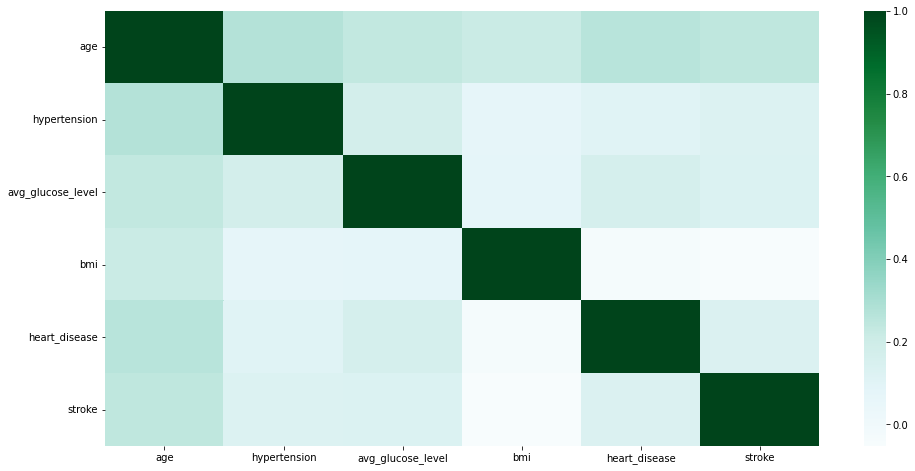

In [ ]:
plt.figure(figsize = (16,8))
sns.heatmap(cormat, cmap="BuGn");

b0 =  0.24401026584227126
b1 =  0.07667189467382451


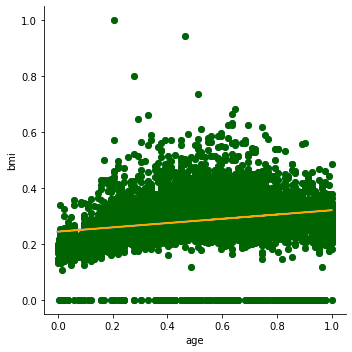

<Figure size 1152x576 with 0 Axes>

In [ ]:
ageAxis = formatted_data["age"]
bmiAxis = formatted_data["bmi"]

age_mean = ageAxis.mean()
bmi_mean = bmiAxis.mean()

nem = ((ageAxis - age_mean) * (bmiAxis - bmi_mean)).sum()
den = (((ageAxis - age_mean)**2).sum())
b1 = nem/den
b0 = bmi_mean - b1 * age_mean

print('b0 = ', b0)
print('b1 = ', b1)

sns.lmplot(x = "age", y = "bmi", data = formatted_data)
plt.scatter(formatted_data["age"], formatted_data["bmi"], color = 'darkgreen')
plt.plot(ageAxis, b1 * ageAxis + b0, color = 'orange')
plt.figure(figsize = (16,8))

plt.show()

#Inference

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(model_inp, model_out, test_size=0.4, random_state = 100)

In [ ]:
import numpy as np

np.random.seed(30)

print("Population mean:", dataset['age'].mean())

sample_age = np.random.choice(a=dataset['age'], size=200)
print ("Sample mean:", sample_age.mean());

Population mean: 43.226614481409015
Sample mean: 45.449400000000004


## Central limit theorem

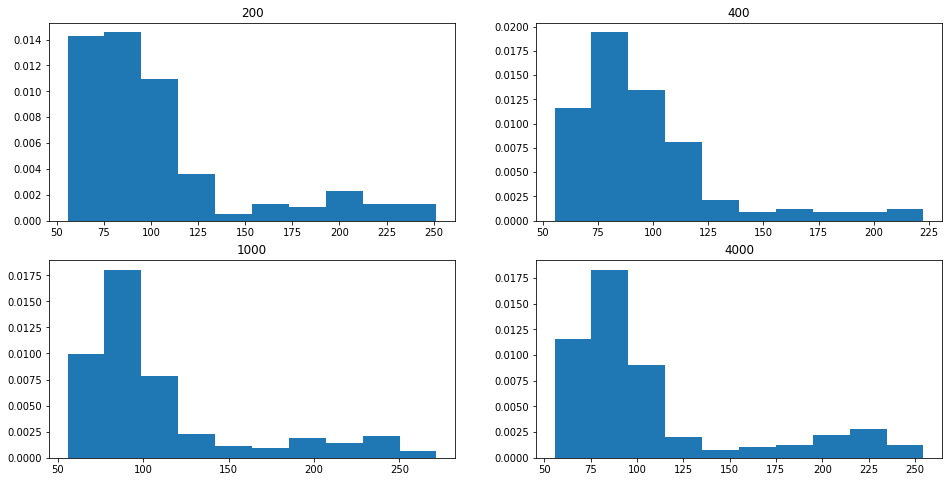

In [ ]:
import numpy
import matplotlib.pyplot as plt

np.random.seed(30)

ns = [200, 400, 1000, 4000]

means = []
for j in ns:
    means.append(np.random.choice(a=dataset['avg_glucose_level'], size=200))

_, ax = plt.subplots(2, 2, figsize=(16, 8))

z = 0
for i in range(2):
  for j in range(2):
    ax[i, j].hist(means[z], 10, density = True)
    ax[i, j].set_title(label = ns[z])
    z = z + 1
  
plt.show()

##Confidence Interval

In [ ]:
import scipy.stats as stats
import math

np.random.seed(10)


sample_size = 3000
sample = np.random.choice(a=dataset['bmi'], size = sample_size)
sample_mean = sample.mean()

zalpha = stats.norm.ppf(q = 0.98)  

print("z value: ", zalpha)
populationStd = dataset['bmi'].std()

errM = zalpha * (populationStd / math.sqrt(sample_size))

confidence_interval = (sample_mean - errM,
                       sample_mean + errM)  

print("Confidence interval:", confidence_interval)
print("True mean: {}".format(dataset['bmi'].mean()))


z value:  2.0537489106318225
Confidence interval: (27.46814717452018, 28.182786158813148)
True mean: 27.75673189823876


# AI Model Training

In [ ]:
model = Sequential()
model.add(Dense(10, input_dim=model_inp.shape[1], activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=50, batch_size=10)

Epoch 1/50
307/307 [==============================] - 1s 2ms/step - loss: 0.2985 - accuracy: 0.9419
Epoch 2/50
307/307 [==============================] - 1s 2ms/step - loss: 0.2023 - accuracy: 0.9494
Epoch 3/50
307/307 [==============================] - 1s 2ms/step - loss: 0.1880 - accuracy: 0.9494
Epoch 4/50
307/307 [==============================] - 0s 2ms/step - loss: 0.1792 - accuracy: 0.9494
Epoch 5/50
307/307 [==============================] - 0s 2ms/step - loss: 0.1749 - accuracy: 0.9494
Epoch 6/50
307/307 [==============================] - 0s 2ms/step - loss: 0.1723 - accuracy: 0.9494
Epoch 7/50
307/307 [==============================] - 1s 2ms/step - loss: 0.1688 - accuracy: 0.9494
Epoch 8/50
307/307 [==============================] - 1s 3ms/step - loss: 0.1664 - accuracy: 0.9494
Epoch 9/50
307/307 [==============================] - 1s 2ms/step - loss: 0.1632 - accuracy: 0.9494
Epoch 10/50
307/307 [==============================] - 1s 2ms/step - loss: 0.1632 - accuracy: 0.9494

In [ ]:
from sklearn.metrics import accuracy_score

prediction = model.predict(x_test)
print(accuracy_score(y_test, prediction.round(), normalize=True))

0.9540117416829745
